# Naïve Bayes

### Overview of Naïve Bayes Classification

Naive Bayes classification is a machine learning algorithm that leverages Bayes' theorem. It operates on the premise of conditional independence among features, making it "naive" in its assumptions. The goal of Naive Bayes is to categorize data into predefined classes or categories. Its nature is rooted in Bayes' theorem, which entails prior probabilities, likelihoods, and posterior probabilities, all interplaying to determine the most likely class for a given set of features. There are different variants of Naive Bayes, such as Gaussian Naive Bayes for continuous numerical data, Multinomial Naive Bayes for text data, and Bernoulli Naive Bayes for binary features. For this project I will be using Gaussian Naive Bayes and Multinomial Naive Bayes. I will be using Naive Bayes classification build and assess models with the goal of predicting vertical jump outcomes using both record and text data. For the record data I will be using NBA combine measurements and for the text data I will be using content from news articles generated queried from the news api based on the player name. I will be looking at if the data can predict whether or not a player has an above average maximum vertical jump.  

### Naive Bayes Understanding 

Before performing Naive Bayes I will touch on a few important concepts to understand in order to understand the model's performance and outcomes.

Splitting the dataset into training and testing sets is essential to assess a Naive Bayes classifier's performance. Training data enables the model to learn underlying patterns, while testing data gauges its ability to generalize to new, unseen data. This separation prevents overfitting, where the model simply memorizes the training data. The testing phase involves using the trained model to predict outcomes for the testing dataset, comparing predictions to actual labels to measure accuracy. For my model, I will use the train_test_split function to partition the data into training and testing sets. With a test size of 20% and a set random state, this division ensures that 20% of the data is reserved for testing, while 80% is utilized for training, allowing for model evaluation and preventing overfitting.

Overfitting and underfitting is also important to understanding and check for. Overfitting occurs when the model is too complex and tightly fits the training data resulting in poor generalization to new data. On the other hand, underfitting happens when the model is too simplistic, failing to capture the underlying patterns in the data. Its important to have a model that is well balanced and not over or under fit. To determine whether the model is overfitting or underfitting, a comparison of its performance on the training and testing data is key. 

In addition, the evaluation of a classification model involves several key metrics, each with its associated equation. Sensitivity, also known as recall, measures the model's ability to correctly identify actual positive cases among all positive predictions (Sensitivity = True Positives / (True Positives + False Negatives)). Precision assesses the accuracy of positive predictions, quantifying the proportion of true positive predictions out of all positive predictions made by the model (Precision = True Positives / (True Positives + False Positives)). The F-score, a harmonic mean of precision and recall, balances the trade-off between these two metrics (F-Score = 2 * (Precision * Recall) / (Precision + Recall)). Specificity evaluates the model's accuracy in correctly identifying actual negative cases (Specificity = True Negatives / (True Negatives + False Positives)). Negative Predictive Value (NPV) measures the proportion of actual negative cases among those predicted as negative (NPV = True Negatives / (True Negatives + False Negatives)). Accuracy provides an overarching measure of the model's overall correctness (Accuracy = (True Positives + True Negatives) / Total Predictions). 



## Record Data


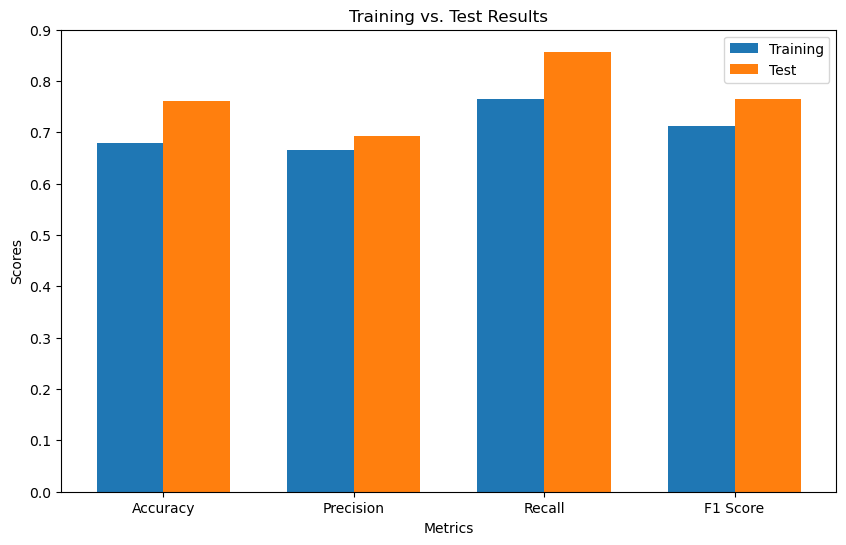

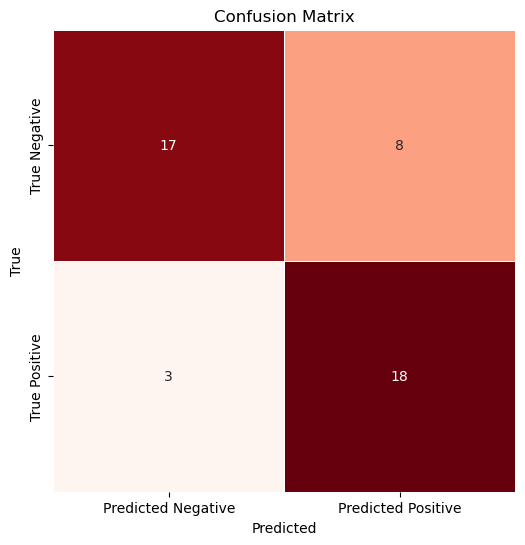

Precision: 0.6923076923076923
Recall: 0.8571428571428571
Specificity: 0.68
Negative Predictive Value: 0.85
F1 Score: 0.7659574468085107
Accuracy: 0.7608695652173914


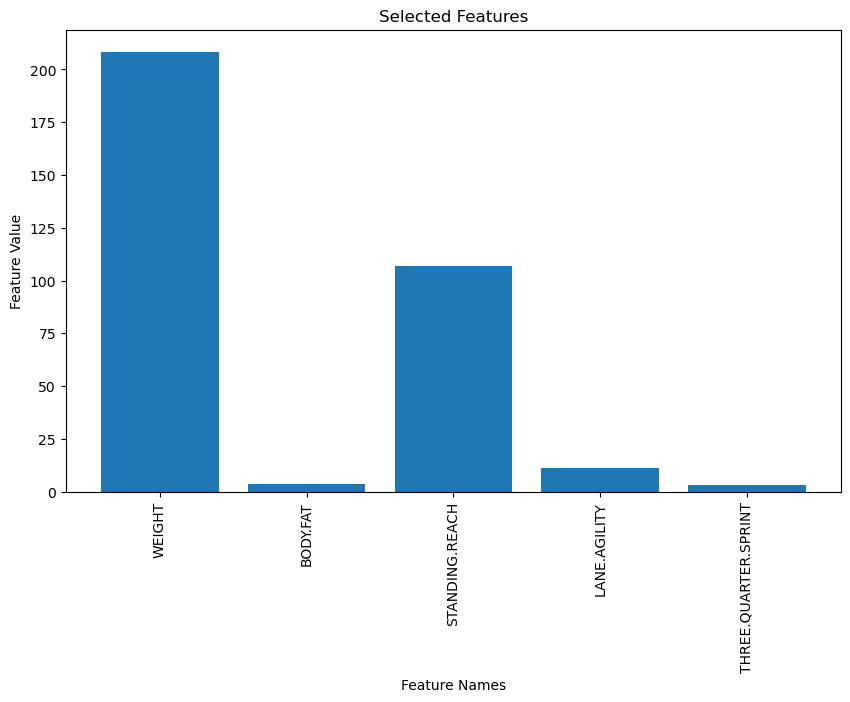

['THREE.QUARTER.SPRINT']
['BODY.FAT', 'THREE.QUARTER.SPRINT']
['BODY.FAT', 'STANDING.REACH', 'THREE.QUARTER.SPRINT']
['BODY.FAT', 'STANDING.REACH', 'LANE.AGILITY', 'THREE.QUARTER.SPRINT']
['HEIGHT', 'BODY.FAT', 'STANDING.REACH', 'LANE.AGILITY', 'THREE.QUARTER.SPRINT']
['HEIGHT', 'WEIGHT', 'BODY.FAT', 'STANDING.REACH', 'LANE.AGILITY', 'THREE.QUARTER.SPRINT']
['HEIGHT', 'WEIGHT', 'BODY.FAT', 'STANDING.REACH', 'WINGSPAN', 'LANE.AGILITY', 'THREE.QUARTER.SPRINT']
['HEIGHT', 'WEIGHT', 'BODY.FAT', 'STANDING.REACH', 'WINGSPAN', 'LANE.AGILITY', 'SHUTTLE.RUN', 'THREE.QUARTER.SPRINT']
['HEIGHT', 'WEIGHT', 'BODY.FAT', 'STANDING.REACH', 'WINGSPAN', 'LANE.AGILITY', 'SHUTTLE.RUN', 'THREE.QUARTER.SPRINT', 'BENCH.PRESS']
['HEIGHT', 'WEIGHT', 'BODY.FAT', 'STANDING.REACH', 'WINGSPAN', 'HAND.LENGTH', 'LANE.AGILITY', 'SHUTTLE.RUN', 'THREE.QUARTER.SPRINT', 'BENCH.PRESS']
['HEIGHT', 'WEIGHT', 'BODY.FAT', 'STANDING.REACH', 'WINGSPAN', 'HAND.LENGTH', 'HAND.WIDTH', 'LANE.AGILITY', 'SHUTTLE.RUN', 'THREE.QUARTER.

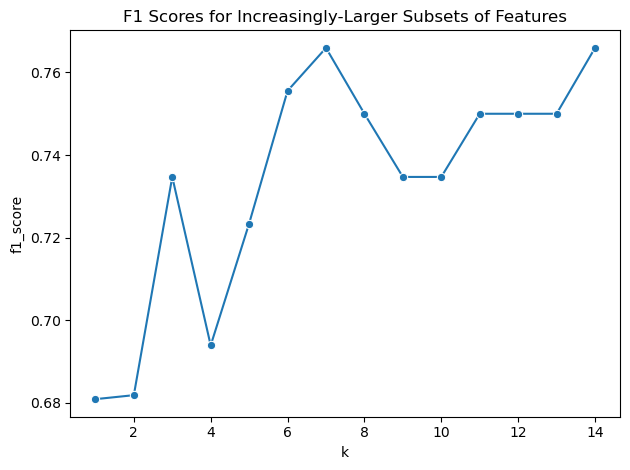

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


combine_df = pd.read_csv("../../data/01-modified-data/cleaned_NBA_combine.csv")


combine_df = combine_df[combine_df["combine_year"]>2009]
combine_df = combine_df.dropna()
max_vert_mean = combine_df["MAX.VERTICAL"].mean()
combine_df["above_max_vert_mean"] = (combine_df["MAX.VERTICAL"]> max_vert_mean).astype(int)


label_vec = combine_df["above_max_vert_mean"]
drop_cols = ["Unnamed: 0", "POS", "Name", "MAX.VERTICAL", "STANDING.VERTICAL", "MAX.TOUCH", "above_max_vert_mean"]

feature_matrix = combine_df.drop(columns= drop_cols)
feature_cols = feature_matrix.columns.tolist()


#Naive bayes
clf = make_pipeline(StandardScaler(), svm.SVC())
clf.fit(feature_matrix, label_vec)


X = feature_matrix
y = label_vec
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=5000
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
test_predictions = clf.predict(X_test_scaled)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols)


#Performance Metrics
accuracy_train = accuracy_score(y_train, clf.predict(X_train_scaled))
accuracy_test = accuracy_score(y_test, test_predictions)
precision_train = precision_score(y_train, clf.predict(X_train_scaled))
precision_test = precision_score(y_test, test_predictions)
recall_train = recall_score(y_train, clf.predict(X_train_scaled))
recall_test = recall_score(y_test, test_predictions)
f1_train = f1_score(y_train, clf.predict(X_train_scaled))
f1_test = f1_score(y_test, test_predictions)

#Bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_results = [accuracy_train, precision_train, recall_train, f1_train]
test_results = [accuracy_test, precision_test, recall_test, f1_test]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))
plt.bar(index, train_results, bar_width, label='Training')
plt.bar([i + bar_width for i in index], test_results, bar_width, label='Test')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Training vs. Test Results')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend(loc='upper right')
plt.show()

#Calculate metrics
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
accuracy = accuracy_score(y_test, test_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
npv = tn / (tn + fn)
F1 = f1_score(y_test, test_predictions)

#Graph confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", linewidths=0.5, cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['True Negative', 'True Positive'])
plt.show()

print('Precision:', precision) 
print('Recall:', recall) 
print('Specificity:', specificity) 
print('Negative Predictive Value:', npv) 
print('F1 Score:', F1)
print('Accuracy:', accuracy) 

#selectkbest feature selection
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(feature_matrix, label_vec)
selected_feature_indices = selector.get_support(indices=True)

feature_names = feature_matrix.columns.tolist()
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_indices)), X_new[0])
plt.xlabel('Feature Names')  
plt.ylabel('Feature Value')
plt.title('Selected Features')
plt.xticks(range(len(selected_feature_indices)), [feature_names[i] for i in selected_feature_indices], rotation=90)
plt.show()



def fscore_from_k(k_val):
  X_selector = SelectKBest(f_classif, k=k_val)
  X_selector.fit(X_train_scaled_df, y_train)
  top_k_colnames = list(X_selector.get_feature_names_out())
  print(top_k_colnames)
  X_train_new = X_train_scaled_df[top_k_colnames].copy()
  X_test_new = X_test_scaled_df[top_k_colnames].copy()
  clf_k = GaussianNB()
  clf_k.fit(X_train_new, y_train)
  y_pred_new = clf_k.predict(X_test_new)
  score_k = f1_score(
    y_true = y_test,
    y_pred = y_pred_new
  )
  return score_k

k_vals = list(range(1, 15))
fscores = [fscore_from_k(kv) for kv in k_vals]
fs_df = pd.DataFrame({'k': k_vals, 'f1_score': fscores})


plot_obj = sns.lineplot(data=fs_df, x='k', y='f1_score', marker='o')
plt.title("F1 Scores for Increasingly-Larger Subsets of Features")
plt.tight_layout()
plt.show()



### Conclusions 

The Naive Bayes classifiers for record data presents good precision (0.6923) and high recall (0.8571), indicating its proficiency in accurately identifying positive outcomes. Specificity is at a reasonable 0.68, and the negative predictive value (NPV) is quite good at 0.85. The F1 score is relatively high at 0.7659, showcasing an overall strong predictive performance. The accuracy stands at 0.7609, reflecting good overall correctness. These scores do not strongly suggest overfitting or underfitting, reinforcing the presence of a well-balanced level of model complexity.

The barchart shows that the model performed better on the test data than the training data, which is good since it shows the model is not overfitting. For feature selection, weight had the highest feature score, which is interesting considering the EDA results, but does make sense. It also showed that the F1 score for the model was highest when using 7 features. Overall the results show that NBA combine measurements can be used to make a good ML model to predict Maximum vertical jump.


## Text Data

Selected feature indices: [ 839 2023 2478 3427 3841]
Selected feature names: ['clipper', 'harden', 'knicks', 'porter', 'rocket']


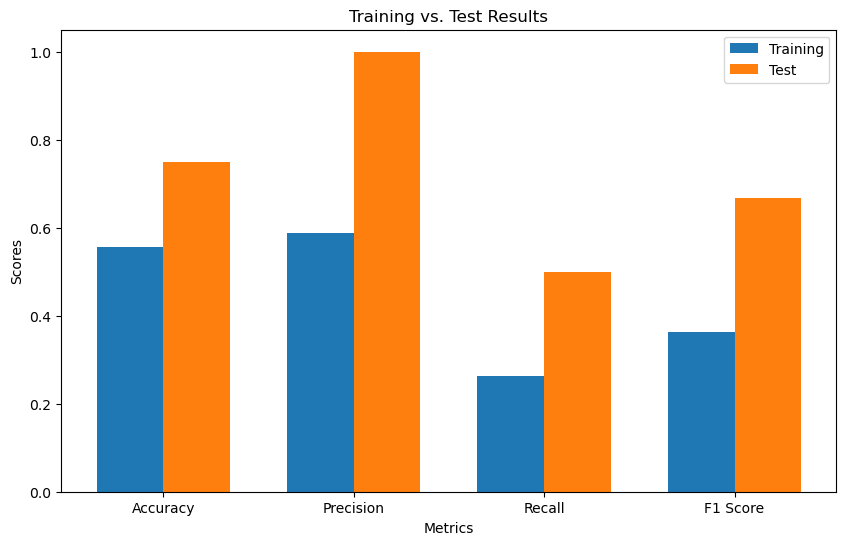

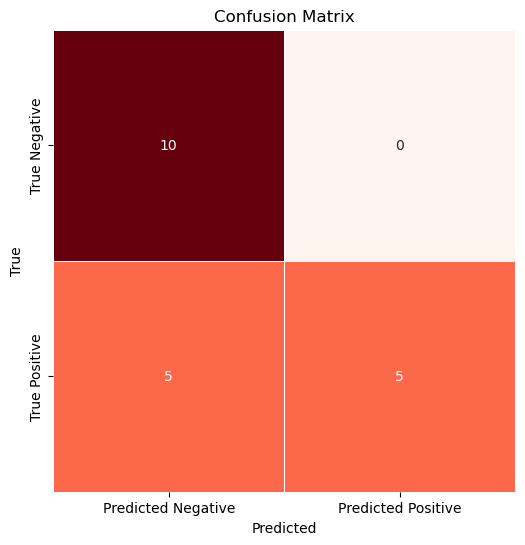

Precision: 1.0
Recall: 0.5
Specificity: 1.0
Negative Predictive Value: 0.6666666666666666
F1 Score: 0.6666666666666666
Accuracy: 0.75


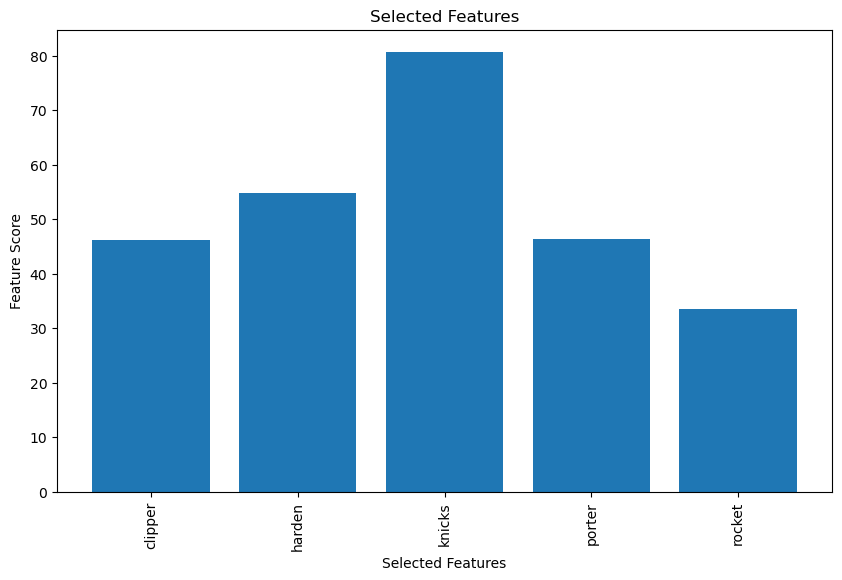

In [355]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib
import matplotlib.pyplot as plt

X = joblib.load('text_matrix.pkl')
text_feature_names = joblib.load('text_names.pkl')

#News api caps at 99 queries
label_vec = combine_df["above_max_vert_mean"].head(99)


max_document_freq = 0.4
min_document_count = 2


#feature selection for text data
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, label_vec)
selected_feature_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_feature_indices)
selected_feature_names = [text_feature_names[i] for i in selected_feature_indices]
print("Selected feature names:", selected_feature_names)

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_new, label_vec,
    test_size=0.2,
    random_state=5000
)

#Scale features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
test_predictions = clf.predict(X_test_scaled)

#Performance metrics
accuracy_train = accuracy_score(y_train, clf.predict(X_train_scaled))
accuracy_test = accuracy_score(y_test, test_predictions)
precision_train = precision_score(y_train, clf.predict(X_train_scaled))
precision_test = precision_score(y_test, test_predictions)
recall_train = recall_score(y_train, clf.predict(X_train_scaled))
recall_test = recall_score(y_test, test_predictions)
f1_train = f1_score(y_train, clf.predict(X_train_scaled))
f1_test = f1_score(y_test, test_predictions)

#Bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_results = [accuracy_train, precision_train, recall_train, f1_train]
test_results = [accuracy_test, precision_test, recall_test, f1_test]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))
plt.bar(index, train_results, bar_width, label='Training')
plt.bar([i + bar_width for i in index], test_results, bar_width, label='Test')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Training vs. Test Results')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend(loc='upper right')
plt.show()

#Calculate metrics
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
accuracy = accuracy_score(y_test, test_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
npv = tn / (tn + fn)
F1 = f1_score(y_test, test_predictions)



#Calculate confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", linewidths=0.5, cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['True Negative', 'True Positive'])
plt.show()


#Print metrics
print('Precision:', precision) 
print('Recall:', recall) 
print('Specificity:', specificity) 
print('Negative Predictive Value:', npv) 
print('F1 Score:', F1)
print('Accuracy:', accuracy) 

# Create a bar chart to visualize the selected features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_indices)), selector.scores_[selected_feature_indices])
plt.xlabel('Selected Features')
plt.ylabel('Feature Score')
plt.title('Selected Features')
plt.xticks(range(len(selected_feature_indices)), selected_feature_names, rotation=90)
plt.show()




### Conclusions

The Naive Bayes classifiers for the text data model exhibit good precision at 1.0, good specificity at 1.0, and pretty good accuracy 0.75. However, its recall is not great at 0.5, indicating room for improvement in correctly identifying positive outcomes. The negative predictive value NPV is also fair at 0.6667. Overall, the model's performance is good in terms of precision, specificity, and accuracy, but there's potential for enhancement in recall and NPV to achieve a more balanced performance. These scores indicate that the model is not exhibiting clear signs of overfitting or underfitting, and has a balanced level of complexity.

Again, The barchart shows that the model performed better on the test data than the training data, which is good since it shows the model is not overfitting. The top 5 selected features were “knick”, “harden”, “porter”, “clipper”, and “rocket”. These are all either the name of popular teams, or the last name of a player. This possibly indicates connections to these specific teams or players results in a higher likelihood to have a high vertical jump, but also could just be coincidental connections. Overall the results show that text data can be used to make a somewhat accurate model to predict vertical jump, and reveal the words that happen to have the most connection to players with an above average vertical jump.  
